# Práctica 4: Problemas rígidos y estabilidad absoluta

In [1]:
from numpy import *
from numpy.linalg import eig
from matplotlib.pyplot import *

def localizar_frontera_RK(dR, N):
    Npoints = 5000
    h = 2*N*pi/Npoints
    z = zeros(Npoints +1 , dtype = complex)
    z[0] = 0
    t = 0
    for k in range(len(z)-1):
        z[k+1] = z[k]+ h*1j*exp(1j*t)/dR(z[k])
        t = t + h
    x, y = real(z), imag(z)
    plot(x, y)
    grid(True)
    axis('equal')

def localizar_frontera(rho, sigma):
    theta = arange(0, 2.*pi, 0.01)
    numer = polyval(rho, exp(theta*1j))
    denom = polyval(sigma, exp(theta*1j))
    mu = numer/denom
    x, y = real(mu), imag(mu)
    plot(x, y)
    grid(True)
    axis('equal')

In [20]:
def euler(a, b, fun, N, y0):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0

    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h*fun(t[k], y[k])
    
    return (t, y)

def rk4(a, b, fun, N, y0):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a 
    y[0] = y0 

    for k in range(N):
        t[k+1] = t[k] + h
        k1 = fun(t[k], y[k])
        k2 = fun(t[k] + h/2, y[k] + h/2 * k1)
        k3 = fun(t[k] + h/2, y[k] + h/2 * k2)
        k4 = fun(t[k+1], y[k] + h*k3)
        y[k+1] = y[k] + h/6 *(k1 + 2*k2 + 2*k3 + k4)
    
    return (t, y)

def AB3(a, b, fun, N, y0):
    y = zeros(N+1)
    t = zeros(N+1)
    f = zeros(N+1)
    t[0] = a
    h = (b-a) / N
    y[0] = y0
    f[0] = fun(a, y[0])

    for k in range(2):
        y[k+1] = y[k] + h*fun(t[k] + h/2, y[k] + h/2 * f[k])
        t[k+1] = t[k] + h
        f[k+1] = fun(t[k+1], y[k+1])
    
    for k in range(2, N):
        y[k+1] = y[k] + h/12 * (23*f[k] - 16*f[k-1] + 5*f[k-2])
        t[k+1] = t[k] + h
        f[k+1] = fun(t[k+1], y[k+1])
        
    return (t, y)

def AM3(a, b, fun, N, y0):
    y = zeros(N+1)
    t = zeros(N+1)
    f = zeros(N+1)
    iteraciones = 0
    t[0] = a
    h = (b-a) / N
    y[0] = y0
    f[0] = fun(a, y[0])
    
    for k in range(2):
        t[k+1] = t[k] + h
        k1 = f[k]
        k2 = fun(t[k] + h/2, y[k] + h/2 * k1)
        k3 = fun(t[k] + h/2, y[k] + h/2 * k2)
        k4 = fun(t[k+1], y[k] + h*k3)
        y[k+1] = y[k] + h/6 *(k1 + 2*k2 + 2*k3 + k4)
        f[k+1] = fun(t[k+1], y[k+1])
    
    for k in range(2, N):
        z = y[k]
        contador = 0
        distancia = 1 + 1e-12
        C = y[k] + h/24 * (19*f[k] - 5*f[k-1] + f[k-2])
        t[k+1] = t[k] + h

        while distancia >= 1e-12 and contador < 200:
            z_nuevo = 9*h*fun(t[k+1], z)/24 + C
            distancia = abs(z - z_nuevo)
            z = z_nuevo
            contador += 1
        if contador == 200:
            print("El método no converge.")
        iteraciones = max(iteraciones, contador)
        y[k+1] = z
        f[k+1] = fun(t[k+1], y[k+1])

    return (t, y, iteraciones)

## Ejercicio 1: Región de estabilidad absoluta
Use el programa Python `dibuja_frontera.py` disponible en la página web de la asignatura para dibujar las regiones de estabilidad absoluta de los métodos:
* Runge-Kutta explícitos de $q$ etapas y orden $q$ para $q = 1, \dots, 5$.
* Adams-Bashforth, Adams-Moulton y diferenciación regresiva de número de pasos entre uno y cuatro.

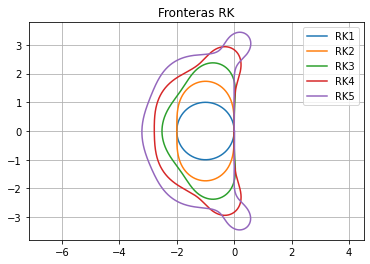

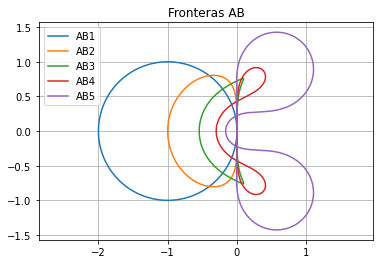

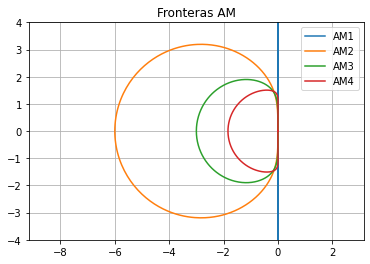

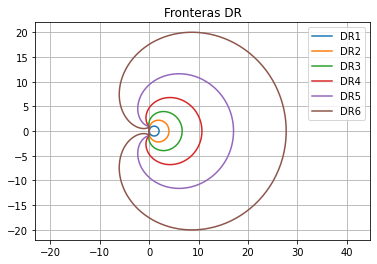

In [15]:
# Fronteras RK
localizar_frontera_RK(lambda z : 1, 1)
localizar_frontera_RK(lambda z : 1 + z, 2)
localizar_frontera_RK(lambda z : 1 + z + z**2/2, 3)
localizar_frontera_RK(lambda z : 1 + z + z**2/2 + z**3/6, 4)
localizar_frontera_RK(lambda z : 1 + z + z**2/2 + z**3/6 + z**4/24, 5)

title("Fronteras RK")
legend(["RK1", "RK2", "RK3", "RK4", "RK5"])
show()

# Fronteras AB
localizar_frontera(array([1, -1]), array([0, 1])) # AB1
localizar_frontera(array([1, -1, 0]), array([0, 3, -1])/2) # AB2
localizar_frontera(array([1, -1, 0, 0]), array([0, 23, -16, 5])/12) # AB3
localizar_frontera(array([1, -1, 0, 0, 0]), array([0, 55, -59, 37, - 9])/24) # AB4
localizar_frontera(array([1, -1, 0, 0, 0, 0]), array([0, 1901, -2774, 2616, -1274, 251])/720) # AB5

title("Fronteras AB")
legend(["AB1", "AB2", "AB3", "AB4", "AB5"])
show()

# Fronteras AM
localizar_frontera(array([1, -1]), array([1, 1])/2) # AM1
localizar_frontera(array([1, -1, 0]), array([5, 8, -1])/12) # AM2
localizar_frontera(array([1, -1, 0, 0]), array([9, 19, -5, 1])/24) # AM3
localizar_frontera(array([1, -1, 0, 0, 0]), array([251, 646, -264, 106, -19])/720) # AM4

title("Fronteras AM")
axis([-6, 0, -4, 4])
legend(["AM1", "AM2", "AM3", "AM4"])
show()

# Fronteras diferenciación regresiva
localizar_frontera(array([1, -1]), array([1, 0])) # DR1
localizar_frontera(array([3, -4, 1])/3, array([2, 0, 0])/3) # DR2
localizar_frontera(array([11, -18, 9, -2])/11, array([6, 0, 0, 0])/11) # DR3
localizar_frontera(array([25, -48, 36, -16, 3])/25, array([12, 0, 0, 0, 0])/25) #DR4
localizar_frontera(array([137, -300, 300, -200, 75, -12])/137, array([60, 0, 0, 0, 0, 0])/137) # DR5
localizar_frontera(array([147, -360, 450, -400, 225, -72, 10])/147, array([60, 0, 0, 0, 0, 0, 0])/147) # DR6

title("Fronteras DR")
legend(["DR1", "DR2", "DR3", "DR4", "DR5", "DR6"])
show()

## Ejercicio 2: Problema stiff
Se considera el problema de valor inicial
$$ \begin{cases}
y' = -1200y + 2000 - 1500e^{-t}, & t \in [0, 4] \\
y(0) = 0
\end{cases} $$
cuya solución exacta es $y(t) = \frac{5}{3} - \frac{1495}{3597}e^{-1200t} - \frac{1500}{1199}e^{-t}$.

Se trata de un problema stiff, en el que la solución contiene dos términos exponenciales que varían a escalas muy diferentes. Obsérvese que la ecuación es de la forma $y′ = f (t, y)$ con
$$\frac{\partial f}{\partial y} = −1200$$

### Apartado a
Estime el menor número de subintervalos $N$ que es necesario tomar para que $h\frac{\partial f}{\partial y} \in D_A$, siendo $D_A$ el dominio de estabilidad absoluta del método de Euler. Aplique el método con valores de $N$ mayores y menores que el estimado y observe qué ocurre.

### Apartado b
Como el método de Euler implícito es absolutamente estable la condición (1) se cumple para cualquier $h$ siendo ahora $D_A$ su dominio de estabilidad absoluta: aplíquelo al problema con cualquier valor de $N$ y observe qué ocurre. Observe que es fácil despejar $y_{k+1}$ en la expresión del método, por lo que no es nececario usar un algoritmo de punto fijo para programarlo.

### Apartado c
Con ayuda de las gráficas de las fronteras de los dominios de estabilidad de los métodos RK obtenidas en el ejercicio 2, estime el valor mínimo de $N$ para el que se cumple (1), siendo ahora $D_A$ el dominio de estabilidad del método RK4. Aplique el método con valores de $N$ mayores y menores que el estimado y observe qué ocurre.

### Apartado d
Repita el ejercicio anterior para los métodos AB3 y AM3, siendo en cada caso $D_A$ el dominio de estabilidad del método de que se trate.

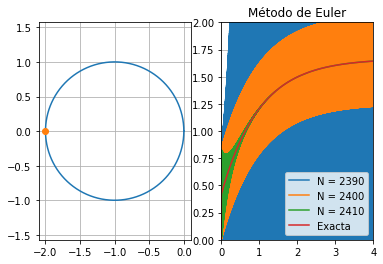

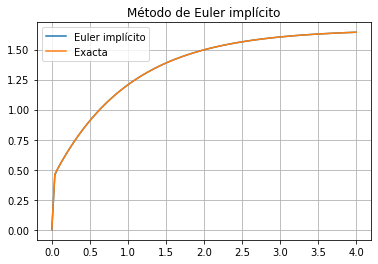

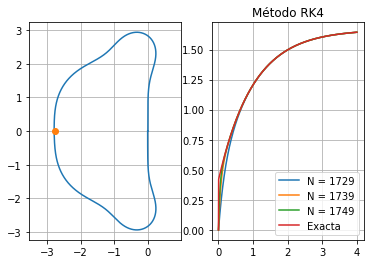

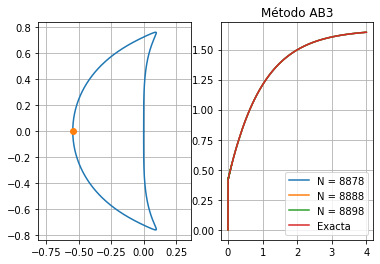

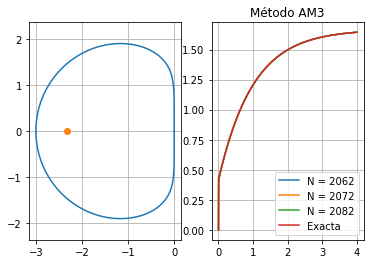

In [47]:
a, b = 0, 4
y0 = 0

def f(t, y):
    return -1200*y + 2000 -1500*exp(-t)

def solucion_exacta(t):
    return 5/3 - 1495/3597 * exp(-1200*t) - 1500/1199 * exp(-t)

# Apartado (a)
subplot(121)
localizar_frontera_RK(lambda z : 1, 1)
rel, iml = -1200, 0

# Obtenemos h para llevar las raíces a la frontera
# La ecuación de la circunferencia es (x+1)^2 + y^2 = 1 => (-1200*h + 1)^2 = 1 <=> h = 1/600
h = 1/600
plot(h*rel, h*iml, "o")

N_critico = int((b-a)/h)
malla = [N_critico-10, N_critico, N_critico+10]

subplot(122)
for N in malla:
    (t, y) = euler(a, b, f, N, y0)
    plot(t, y)
plot(t, solucion_exacta(t))

title("Método de Euler")
axis([a, b, 0, 2])
legend(["N = " + str(N) for N in malla] + ["Exacta"])
grid(True)
show()

# Apartado (b)

def euler_implicito(a, b, fun, N, y0):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0

    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = (y[k] + h*(2000 - 1500*exp(-t[k+1]))) / (1 + 1200*h)
    
    return (t, y)

(t, y) = euler_implicito(a, b, f, 100, y0)
plot(t, y)
plot(t, solucion_exacta(t))

title("Método de Euler implícito")
legend(["Euler implícito", "Exacta"])
grid(True)
show()

# Apartado (c)

subplot(121)
localizar_frontera_RK(lambda z : 1 + z + z**2/2 + z**3/6, 4)
rel, iml = -1200, 0
h = 0.0023 # Obtenemos h para llevar las raíces a la frontera
plot(h*rel, h*iml, "o")

N_critico = int((b-a)/h)
malla = [N_critico-10, N_critico, N_critico+10]

subplot(122)
for N in malla:
    (t, y) = rk4(a, b, f, N, y0)
    plot(t, y)
plot(t, solucion_exacta(t))

title("Método RK4")
legend(["N = " + str(N) for N in malla] + ["Exacta"])
grid(True)
show()

# Apartado (d)

# Método AB3
subplot(121)
localizar_frontera(array([1, -1, 0, 0]), array([0, 23, -16, 5])/12)
rel, iml = -1200, 0
h = 0.00045 # Obtenemos h para llevar las raíces a la frontera
plot(h*rel, h*iml, "o")

N_critico = int((b-a)/h)
malla = [N_critico-10, N_critico, N_critico+10]

subplot(122)
for N in malla:
    (t, y) = AB3(a, b, f, N, y0)
    plot(t, y)
plot(t, solucion_exacta(t))

title("Método AB3")
legend(["N = " + str(N) for N in malla] + ["Exacta"])
grid(True)
show()

# Método AM3
subplot(121)
localizar_frontera(array([1, -1, 0, 0]), array([9, 19, -5, 1])/24)
rel, iml = -1200, 0
h = 0.00193 # Obtenemos h para llevar las raíces a la frontera
plot(h*rel, h*iml, "o")

N_critico = int((b-a)/h)
malla = [N_critico-10, N_critico, N_critico+10]

subplot(122)
for N in malla:
    (t, y, iteraciones) = AM3(a, b, f, N, y0)
    plot(t, y)
plot(t, solucion_exacta(t))

title("Método AM3")
legend(["N = " + str(N) for N in malla] + ["Exacta"])
grid(True)
show()

## Ejercicio 3
Se considera la ecuación
$$ \begin{cases}
x'' + 20x' + 101x = 0 \\
x(0) = 1, \quad x'(0) = -10
\end{cases} $$
cuya solución es $x(t) = e^{-10t}\cos(t)$ en el intervalo $[0, 7]$. Reescriba la ecuación como un sistema de dos ecuaciones de primer orden. Calcule (a mano) los autovalores $\lambda_1$ y $\lambda_2$ de la matriz. Repita el ejercicio anterior para este problema, sustituyendo en cada caso la condición (1) por
$$h\lambda_i \in D_A, \quad i = 1, 2$$

Matriz A:
 [[   0    1]
 [-101  -20]]
Autovalores de A: [-10.+1.j -10.-1.j]


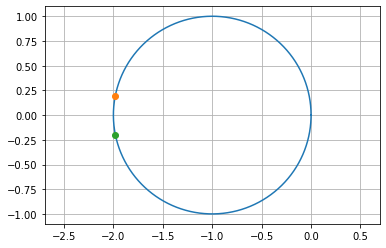

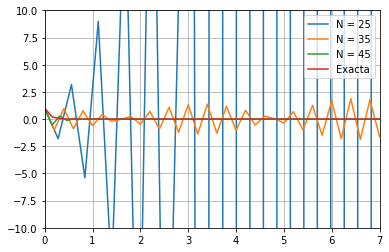

In [24]:
def euler_sistema(a, b, fun, N, y0):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros([len(y0), N+1])
    t[0] = a
    y[:, 0] = y0

    for k in range(N):
        t[k+1] = t[k]+h
        y[:, k+1] = y[:, k]+h*fun(t[k], y[:, k])
    
    return (t, y)

localizar_frontera_RK(lambda z : 1, 1)

A = array([[0, 1], [-101, -20]])
print("Matriz A:\n", A)
print("Autovalores de A:", eig(A)[0])

rel, iml = -10, 1

# Obtenemos h para llevar las raíces a la frontera
# La ecuación de la circunferencia es (x+1)^2 + y^2 = 1
# (-10*h + 1)^2 + h^2 = 1 <=> h = 20/101
h = 20/101
plot(h*rel, h*iml, "o", h*rel, -h*iml, "o")
show()

def f(t, z):
    z1, z2 = z
    return array([z2, -101*z1 - 20*z2])

def solucion_exacta(t):
    return exp(-10*t)*cos(t)

a, b = 0, 7
N_critico = int((b-a)/h)
z0 = array([1, -10])

malla = [N_critico-10, N_critico, N_critico+10]

for N in malla:
    (t, w) = euler_sistema(a, b, f, N, z0)
    plot(t, w[0])

plot(t, solucion_exacta(t))
axis([a, b, -10, 10])
legend(["N = " + str(N) for N in malla] + ["Exacta"])
grid(True)
show()

## Ejercicio 4
Repita el apartado 3(d) y el correspondiente del ejercicio 4 usando ahora el método de diferenciación regresiva de 3 pasos:
$$y_{n+3} - \frac{18}{11}y_{n+2} + \frac{9}{11}y_{n+1} - \frac{2}{11}y_n = \frac{6}{11}hf_{n+3}$$

Matriz A:
 [[   0    1]
 [-101  -20]]
Autovalores de A: [-10.+1.j -10.-1.j]


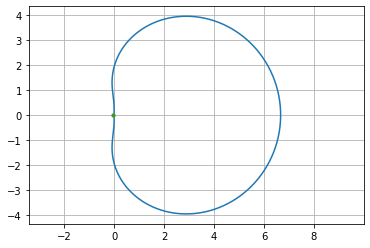

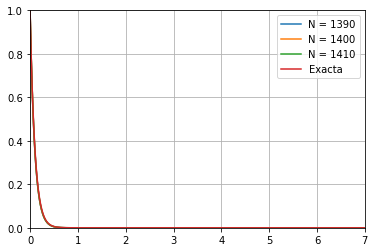

In [28]:
def euler_sistema(a, b, fun, N, y0):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros([len(y0), N+1])
    t[0] = a
    y[:, 0] = y0

    for k in range(N):
        t[k+1] = t[k]+h
        y[:, k+1] = y[:, k]+h*fun(t[k], y[:, k])
    
    return (t, y)

localizar_frontera(array([11, -18, 9, -2])/11, array([6, 0, 0, 0])/11)

A = array([[0, 1], [-101, -20]])
print("Matriz A:\n", A)
print("Autovalores de A:", eig(A)[0])

rel, iml = -10, 1
# Obtenemos h para llevar las raíces a la frontera
h = 0.005 # Aproximación
plot(h*rel, h*iml, ".", h*rel, -h*iml, ".")
show()

def f(t, z):
    z1, z2 = z
    return array([z2, -101*z1 - 20*z2])

def solucion_exacta(t):
    return exp(-10*t)*cos(t)

a, b = 0, 7
N_critico = int((b-a)/h)
z0 = array([1, -10])

malla = [N_critico-10, N_critico, N_critico+10]

for N in malla:
    (t, w) = euler_sistema(a, b, f, N, z0)
    plot(t, w[0])

plot(t, solucion_exacta(t))
axis([a, b, 0, 1])
legend(["N = " + str(N) for N in malla] + ["Exacta"])
grid(True)
show()